In [39]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession, HiveContext
import seaborn as sns

In [40]:
#SparkContext.setSystemProperty("hive.metastore.uris", "mysql://localhost:3306")

In [41]:
sparkSession = (SparkSession
                .builder
                .appName('example-pyspark-read-and-write-from-hive')
                .enableHiveSupport()
                .getOrCreate())

In [42]:
df_load = sparkSession.sql('SELECT * FROM twitter limit 10')
df_load.show()

+-------------------+-----------------+--------------+------------------+--------------------+------------------+--------------------+
|             id_str|       created_at|favorite_count|           user_id|           user_name|     user_location|                text|
+-------------------+-----------------+--------------+------------------+--------------------+------------------+--------------------+
|1175912282712236033|20190922:16:18:30|         40717|         292929271|        Charlie Kirk| Chicago, Illinois|This weekend Trum...|
|1175746952899846144|20190922:05:21:32|         35163|          20094409|        Barb McQuade|     Ann Arbor, MI|While a sitting P...|
|1175539271786094593|20190921:15:36:17|         24940|        4091551984|      Laurence Tribe|                  |This is the momen...|
|1176153059778539522|20190923:08:15:15|             0|          68031291|               CMMGA|                  |RT @AriMelber: Sp...|
|1176153059648425984|20190923:08:15:15|             0| 

In [43]:
#sparkSession.sql("LOAD DATA INPATH 'hdfs://quickstart.cloudera:8020/user/cloudera/output/part-1569164885965.txt' INTO TABLE twitter")

words spot
[u'This weekend Trump supporters volunteered their time to clean up a Democrat city  Media silent  While the left pret& https://t.co/JVSGjhZuHK', u'While a sitting President cannot be indicted, Giuliani can. More facts are needed, but if he brokered deal to trade& https://t.co/SDweOOIvwy', u'This is the moment of truth. Trump must stop suppressing the whistleblower\x19s report now \x14 or face the consequences& https://t.co/OgpYwkYaUd', u'RT @AriMelber: Speaker Pelosi argues Pres. Trump broke the law, but that is best addressed through the next election not impeachment.   Wha&', u'RT @letsberealppl2: Yup, Looks Like That Big Anti-Trump, Whistleblower Story Was All Smoke And Mirrors | Daily Wire https://t.co/m4fz86KVpS&', u"@upzone_Louis @DougKass @jwgop @NPR trump's character has been so poisoned by years of criminal activity that he no& https://t.co/mViE2lmLAK", u"RT @Cruellaisdevine: @brycetache If you can't call your Representative right now...send a quick letter via @The

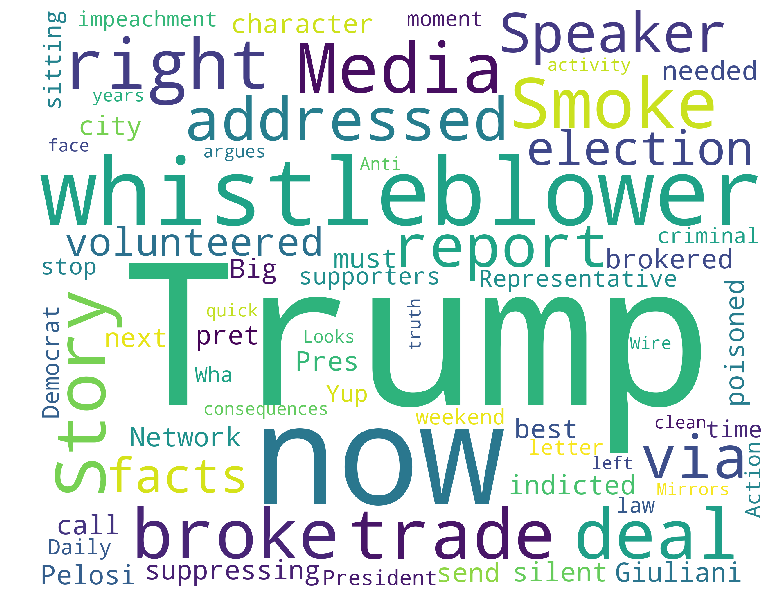

In [44]:

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
def wordcloud_draw(data, color = 'black'):
    k =[]
    for d in data:
        if d !=None: 
            k.append(d)
    data = k
    print(data)
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

    
train_pos = df_load.toPandas()
train_pos = train_pos['text']
print("words spot")
wordcloud_draw(train_pos,'white')

In [45]:
timestatistic = sparkSession.sql("select * from twittertime")

timestatistic.show()


Py4JJavaError: An error occurred while calling o135.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 31.0 failed 1 times, most recent failure: Lost task 0.0 in stage 31.0 (TID 825, localhost, executor driver): java.io.FileNotFoundException: File does not exist: hdfs://quickstart.cloudera:8020/user/hive/warehouse/twittertime/part-00001-0af7bb3a-b8b9-4f55-86b3-b4634eff0aa4-c000.snappy.parquet
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:135)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:186)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:109)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.scan_nextBatch_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$12$$anon$1.hasNext(WholeStageCodegenExec.scala:631)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:253)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:247)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$25.apply(RDD.scala:836)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$25.apply(RDD.scala:836)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1661)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1649)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1648)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1648)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1882)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1831)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1820)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:642)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2034)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2055)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2074)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:363)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:38)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$collectFromPlan(Dataset.scala:3284)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2495)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2495)
	at org.apache.spark.sql.Dataset$$anonfun$51.apply(Dataset.scala:3265)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:77)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3264)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2495)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2709)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:254)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.io.FileNotFoundException: File does not exist: hdfs://quickstart.cloudera:8020/user/hive/warehouse/twittertime/part-00001-0af7bb3a-b8b9-4f55-86b3-b4634eff0aa4-c000.snappy.parquet
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:135)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:186)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:109)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.scan_nextBatch_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$12$$anon$1.hasNext(WholeStageCodegenExec.scala:631)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:253)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:247)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$25.apply(RDD.scala:836)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$25.apply(RDD.scala:836)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [ ]:
timestatistic = timestatistic.toPandas()
f, ax= plt.subplots(figsize=(12,5))
sns.barplot(x=timestatistic['time'],y=timestatistic['count'])
plt.title("Main Genres",color = 'blue',fontsize=15)
plt.xlabel('Genres Types')
plt.xticks(rotation=45)
plt.show()

In [ ]:
htm = sparkSession.sql("select * from averageword limit 20")
htm.show()



In [46]:
data = htm.toPandas()
htm.describe()


DataFrame[summary: string, user_location: string, alen: string]

In [47]:
labels = data['user_location'].values
#colors = ['orange','red','magenta','yellow','green']
#explode = [0.1,0.1,0.1,0.1,0.1]
sizes = data['alen'].values

sizes

array([ 93., 140., 140., 140., 140., 140., 140., 139., 140.,  98., 110.,
       140., 140., 140., 140., 140., 140., 139., 140., 140.])

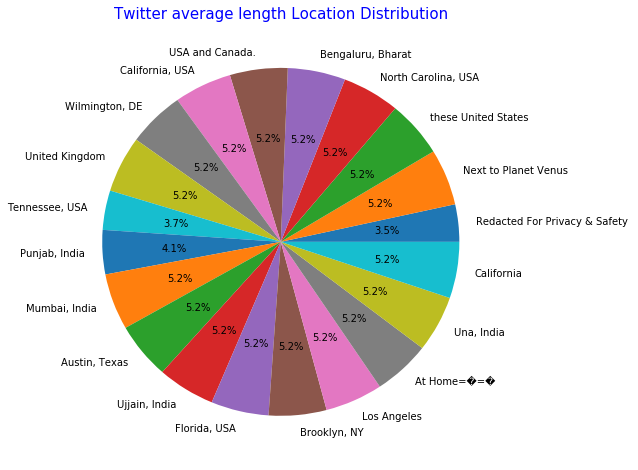

In [48]:
plt.figure(figsize = (8,8))
plt.pie(sizes,  labels=labels, autopct='%1.1f%%')
plt.title('Twitter average length Location Distribution',color = 'blue',fontsize = 15)
plt.show()

In [49]:
userstatistic = sparkSession.sql("select * from maxtwittes")
userstatistic.show()

+-------------------+---+
|            user_id|cnt|
+-------------------+---+
| 996701982499930112|  9|
|           43131318|  9|
|1169177122398560261|  9|
| 987469137403297792|  9|
|         1638007915|  9|
|          333014276|  9|
|           59152065|  9|
| 702070061020753920|  9|
|           48605339|  9|
|           66019603|  9|
|         2905909063|  9|
|          245662961|  9|
|           93075303|  9|
|           18030576|  9|
| 811008691969196032|  9|
| 943447081234006016|  9|
|1097643089059934208|  9|
|         2211337772|  9|
|1097353175751933952|  9|
| 940562939311833088|  9|
+-------------------+---+
only showing top 20 rows



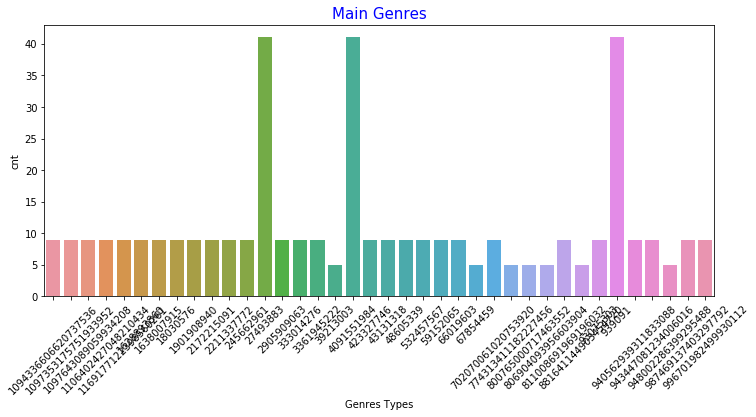

In [50]:
userstatistic = userstatistic.toPandas()
f, ax= plt.subplots(figsize=(12,5))
sns.barplot(x=userstatistic['user_id'],y=userstatistic['cnt'])
plt.title("Main Genres",color = 'blue',fontsize=15)
plt.xlabel('Genres Types')
plt.xticks(rotation=45)
plt.show()